In [2]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize



# Part 1

In [3]:
p1 = [] 
error1 = [1,0.01] 
csv1 = ["P1_20cm.csv", "P1_30cm.csv", "P1_40cm.csv"]
for i in range(3):
    run = []
    for j in range(2):  
        collumn = np.genfromtxt(csv1[i], delimiter=",", usecols=(j), skip_header=1)
        collumn = unumpy.uarray(collumn, std_devs = error1[j])
        if j == 0 :
            frequncy = 299792458 / (collumn*(10**(-9))) # c = 299792458 m/s, frequency = c/lambda
            run.append(frequncy)
        else : run.append(collumn*(-1))
    p1.append(run)
    
# [3 runs][frequency (Hz), stopping potential (V)] 
# print(p1)



[ 3.61577307e-15 -1.35849416e+00] [1.47708305e-16 9.94544248e-02]
------------------------------
Chi Square value:
42.67154604035274
Expected value
4
Minimum Chi-Square for a good fit
-1.6568542494923806
Maximum Chi-Square for a good fit
9.65685424949238
Doubtful minimum Chi-Square for a good fit
-4.485281374238571
Doubtful maximum Chi-Square for a good fit
12.485281374238571
------------------------------
Part 1_20cm


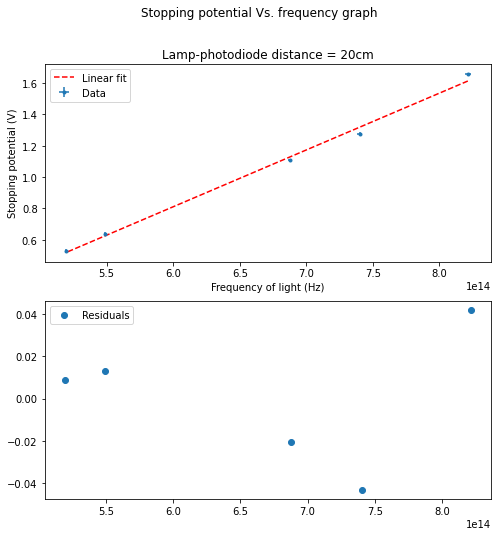

[ 4.17151829e-15 -1.61906627e+00] [2.51156666e-16 1.69107903e-01]
------------------------------
Chi Square value:
123.3723885751713
Expected value
4
Minimum Chi-Square for a good fit
-1.6568542494923806
Maximum Chi-Square for a good fit
9.65685424949238
Doubtful minimum Chi-Square for a good fit
-4.485281374238571
Doubtful maximum Chi-Square for a good fit
12.485281374238571
------------------------------
Part 1_30cm


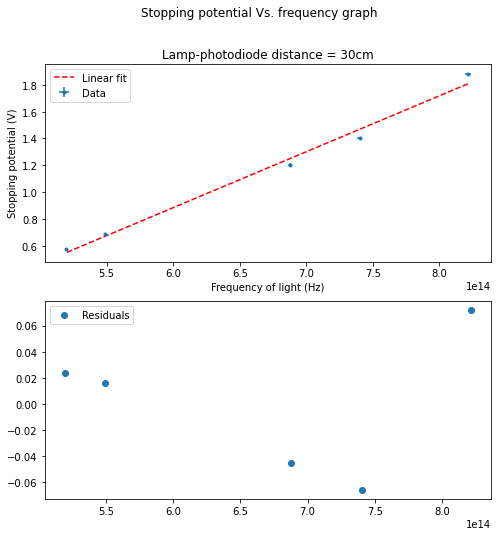

[ 4.14476110e-15 -1.60811118e+00] [2.72216874e-16 1.83288087e-01]
------------------------------
Chi Square value:
144.93011420979238
Expected value
4
Minimum Chi-Square for a good fit
-1.6568542494923806
Maximum Chi-Square for a good fit
9.65685424949238
Doubtful minimum Chi-Square for a good fit
-4.485281374238571
Doubtful maximum Chi-Square for a good fit
12.485281374238571
------------------------------
Part 1_40cm


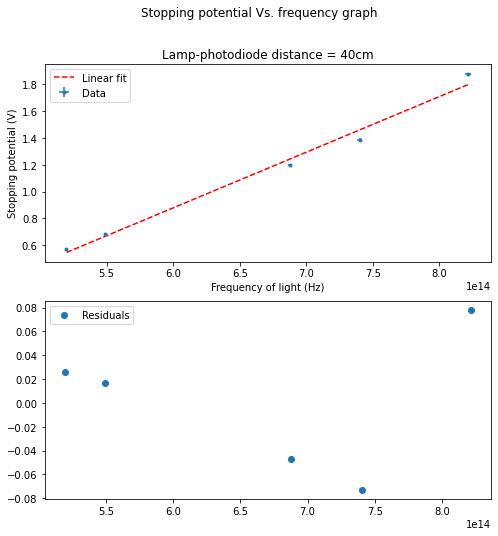

In [12]:
m, m_u =[], []
b, b_u = [], []
title = ["Lamp-photodiode distance = 20cm", "Lamp-photodiode distance = 30cm", "Lamp-photodiode distance = 40cm"]
for i in range(3):
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)

    x = p1[i][0] # frequency  
    y = p1[i][1] # stopping potential 

    plt.errorbar(unumpy.nominal_values(x), unumpy.nominal_values(y),xerr= unumpy.std_devs(x),yerr= unumpy.std_devs(y), fmt=".", label = 'Data')
    
    def f(x,a, b):
        return a*x +b
    popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(x), ydata=unumpy.nominal_values(y), sigma=unumpy.std_devs(y), p0 = [0.4148*10**-14, 0]) 
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    
    m.append(popt[0])
    m_u.append(perr[0])
    b.append(popt[1])
    b_u.append(perr[1])

    def fit(x):
        return popt[0]*x + popt[1]

    plt.plot(unumpy.nominal_values(x), fit(unumpy.nominal_values(x)), 'r--',label='Linear fit')
    plt.legend()
    plt.xlabel("Frequency of light (Hz)")
    plt.ylabel("Stopping potential (V)")
    plt.suptitle("Stopping potential Vs. frequency graph ")
    plt.title(title[i])

    plt.subplot(2,1,2)

    plt.plot(unumpy.nominal_values(x), (unumpy.nominal_values(y))-(fit(unumpy.nominal_values(x))), 'o', label = "Residuals")
    plt.legend()
    print('-'*30)

    f_degree = len(x)-1
    print('Chi Square value:')
    print(sum( ( (unumpy.nominal_values(y)-(fit(unumpy.nominal_values(x)))) / unumpy.std_devs(y))**2 ) )
    print('Expected value')
    print(f_degree)
    print('Minimum Chi-Square for a good fit')
    print(f_degree - 2* (2*f_degree)**0.5)
    print('Maximum Chi-Square for a good fit')
    print(f_degree + 2* (2*f_degree)**0.5)

    print('Doubtful minimum Chi-Square for a good fit')
    print(f_degree - 3* (2*f_degree)**0.5)
    print('Doubtful maximum Chi-Square for a good fit')
    print(f_degree + 3* (2*f_degree)**0.5)
    print('-'*30)
    t = "Part 1_" + title[i][len(title[i])-4:len(title[i])]
    print(t)
    plt.savefig(t)
    plt.show()



In [5]:
slopes = unumpy.uarray(m,m_u)
plank = slopes *  1.60217662 * 10**-19 # slope = h/e , e = 1.60217662 × 10-19
for i in range(3):
    print("Plank's constant for", title[i][len(title[i])-4:len(title[i])], "run is:", plank[i])


combined_plank = np.mean(plank)
print("Combined average for plank's constant is" , combined_plank)



Plank's constant for 20cm run is: (5.79+/-0.24)e-34
Plank's constant for 30cm run is: (6.7+/-0.4)e-34
Plank's constant for 40cm run is: (6.6+/-0.4)e-34
Combined average for plank's constant is (6.37+/-0.21)e-34


In [6]:
y_intercept = unumpy.uarray(b,b_u)
 
min_frequency = -y_intercept/slopes # 0 = mx_0 + b ---> x_0 = -b/m

for i in range(3):
    print("Minimum frequency for the ", title[i][len(title[i])-4:len(title[i])], "run is:", min_frequency[i])


combined_min_frequency = np.mean(min_frequency)
print("Combined average for minimum frequency is" , combined_min_frequency)


Minimum frequency for the  20cm run is: (3.76+/-0.31)e+14
Minimum frequency for the  30cm run is: (3.9+/-0.5)e+14
Minimum frequency for the  40cm run is: (3.9+/-0.5)e+14
Combined average for minimum frequency is (3.84+/-0.25)e+14


# Part 2 

In [7]:
p2 = [] 
error2 = [10**(-13),0.001] 
csv2 = ["P2_8mm.csv", "P2_4mm.csv", "P2_2mm.csv"]
for i in range(3):
    run = []
    for j in range(2):  
        collumn = np.genfromtxt(csv2[i], delimiter=",", usecols=(j), skip_header=1, )
        collumn = unumpy.uarray(collumn, std_devs = error2[j])
        run.append(collumn)
    p2.append(run)
    
# [3 runs][current [A], voltage (V)] 
# print(p2)

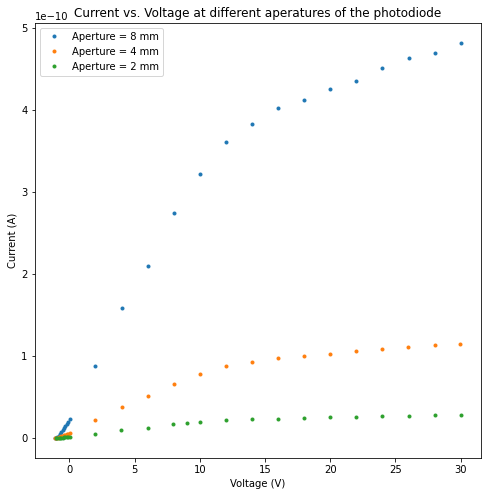

In [8]:
plt.figure(figsize=(8, 8))
aperture = ("8 mm", "4 mm", "2 mm")
for i in range(3):
    x = p2[i][1] # voltage
    y = p2[i][0] # current  
    plt.plot(unumpy.nominal_values(x), unumpy.nominal_values(y), ".", label = 'Aperture = '+aperture[i])
plt.xlabel("Voltage (V)")
plt.title("Current vs. Voltage at different aperatures of the photodiode")
plt.ylabel("Current (A)")
plt.legend()
plt.savefig("P2")
plt.show()



# Part 3

In [9]:
p3 = [] 
error3 = [10**(-13),0.001] 
csv3 = ["P3_365nm.csv", "P3_405nm.csv", "P3_436nm.csv"]
for i in range(3):
    run = []
    for j in range(2):  
        collumn = np.genfromtxt(csv3[i], delimiter=",", usecols=(j), skip_header=1, )
        collumn = unumpy.uarray(collumn, std_devs = error3[j])
        run.append(collumn)
    p3.append(run)
    
# [3 runs][current [A], voltage (V)] 
# print(p3)

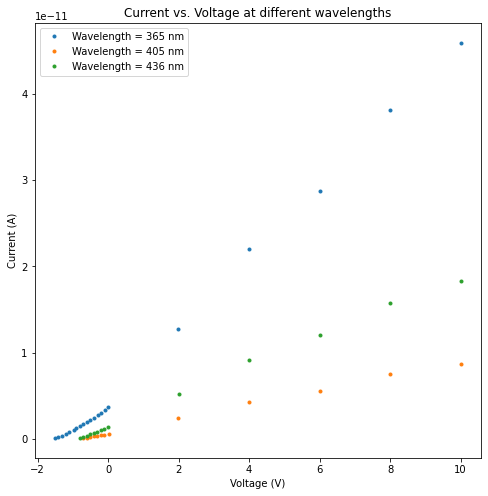

In [10]:
plt.figure(figsize=(8, 8))
wavelengths = ["365 nm", "405 nm", "436 nm"]
for i in range(3):
    x = p3[i][1] # voltage
    y = p3[i][0] # current  
    plt.plot(unumpy.nominal_values(x), unumpy.nominal_values(y), ".", label = 'Wavelength = '+wavelengths[i])
plt.xlabel("Voltage (V)")
plt.title("Current vs. Voltage at different wavelengths")
plt.ylabel("Current (A)")
plt.legend()
plt.savefig("P3")
plt.show()
